In [829]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_validate

In [830]:
df = pd.read_csv('/Users/lilygoldwasser/Documents/metis/Regression/csv/MOJOMOJO2.csv',index_col=0)

In [831]:
df.head(2)

,URL,Rank,Title,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Distributor,Domestic_Opening,Budget,Release_Month,Rating,Runtime,Genres,Markets
0,/title/tt0499549/?ref_=bo_cso_table_1,1,Avatar,2847246203,760507625.0,26.7,2086738578,73.3,2009-01-01,Twentieth Century Fox,77025481.0,237000000.0,1900-12-01,PG13,2 hr 42 min,Action\n \n Adventure\n \n ...,77.0
1,/title/tt0499549/?ref_=bo_cso_table_1,1,Avatar,2847246203,760507625.0,26.7,2086738578,73.3,2009-01-01,Twentieth Century Fox,77025481.0,237000000.0,1900-12-01,PG13,2 hr 42 min,Action\n \n Adventure\n \n ...,77.0


In [832]:
len(df)

1431

In [833]:
df2=df.drop_duplicates(subset=['Title'])

In [834]:
len(df2)

1187

In [835]:
df2.head(2)

,URL,Rank,Title,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Distributor,Domestic_Opening,Budget,Release_Month,Rating,Runtime,Genres,Markets
0,/title/tt0499549/?ref_=bo_cso_table_1,1,Avatar,2847246203,760507625.0,26.7,2086738578,73.3,2009-01-01,Twentieth Century Fox,77025481.0,237000000.0,1900-12-01,PG13,2 hr 42 min,Action\n \n Adventure\n \n ...,77.0
2,/title/tt4154796/?ref_=bo_cso_table_2,2,Avengers: Endgame,2797501328,858373000.0,30.7,1939128328,69.3,2019-01-01,Walt Disney Studios Motion Pictures,357115007.0,356000000.0,1900-04-01,PG13,3 hr 1 min,Action\n \n Adventure\n \n ...,77.0


Clean up Genres into their own columns

In [836]:
#df2=mojomojo

In [837]:
# genre_list = []
def create_list(string_genre): #break string up into individual words
    try:
        string_genre= string_genre.replace(' ','')            #remove whitespace
        string_list = string_genre.split('\n')                #get rid of n
        genre_list = [item for item in string_list if len(item)>1] #items
        return genre_list    
    except:
        pass   #check in genres to see where there might be differences

In [838]:
x = df2['Genres'].apply(create_list)

In [839]:
print(x)

0                     [Action, Adventure, Fantasy, SciFi]
2                       [Action, Adventure, Drama, SciFi]
4                                        [Drama, Romance]
6                              [Action, Adventure, SciFi]
8                              [Action, Adventure, SciFi]
                              ...                        
1426       [Action, Adventure, Animation, Comedy, Family]
1427                                    [Horror, Mystery]
1428         [Action, Adventure, Horror, SciFi, Thriller]
1429                                     [Drama, Romance]
1430    [Adventure, Animation, Comedy, Drama, Family, ...
Name: Genres, Length: 1187, dtype: object


In [842]:
df2['newCol'] = x.values

<ipython-input-842-a5a8d8fb1086>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['newCol'] = x.values


In [843]:
df2.head(2)

,URL,Rank,Title,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Distributor,Domestic_Opening,Budget,Release_Month,Rating,Runtime,Genres,Markets,newCol
0,/title/tt0499549/?ref_=bo_cso_table_1,1,Avatar,2847246203,760507625.0,26.7,2086738578,73.3,2009-01-01,Twentieth Century Fox,77025481.0,237000000.0,1900-12-01,PG13,2 hr 42 min,Action\n \n Adventure\n \n ...,77.0,"[Action, Adventure, Fantasy, SciFi]"
2,/title/tt4154796/?ref_=bo_cso_table_2,2,Avengers: Endgame,2797501328,858373000.0,30.7,1939128328,69.3,2019-01-01,Walt Disney Studios Motion Pictures,357115007.0,356000000.0,1900-04-01,PG13,3 hr 1 min,Action\n \n Adventure\n \n ...,77.0,"[Action, Adventure, Drama, SciFi]"


In [844]:
#Separates newCol row values into Dummy Columns
df = df2['newCol'].str.join(sep='*').str.get_dummies(sep='*')
df.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [845]:
#combine 2 dataframes
df3 = pd.concat([df2, df], axis=1)

In [846]:
df3.head(2)

,URL,Rank,Title,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Distributor,...,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,/title/tt0499549/?ref_=bo_cso_table_1,1,Avatar,2847246203,760507625.0,26.7,2086738578,73.3,2009-01-01,Twentieth Century Fox,...,0,0,0,0,0,1,0,0,0,0
2,/title/tt4154796/?ref_=bo_cso_table_2,2,Avengers: Endgame,2797501328,858373000.0,30.7,1939128328,69.3,2019-01-01,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,1,0,0,0,0


In [847]:
df3.columns

Index(['URL', 'Rank', 'Title', 'World_Gross', 'Domestic_Gross',
       'Domestic_Percentage', 'Foreign_Gross', 'Foreign_Percentage', 'Year',
       'Distributor', 'Domestic_Opening', 'Budget', 'Release_Month', 'Rating',
       'Runtime', 'Genres', 'Markets', 'newCol', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'SciFi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

Drop duplicate columns (sci-fi / scifi, thriller / horror, musical / music)

In [848]:
df3 = df3.drop('Genres',1)
df3.columns

Index(['URL', 'Rank', 'Title', 'World_Gross', 'Domestic_Gross',
       'Domestic_Percentage', 'Foreign_Gross', 'Foreign_Percentage', 'Year',
       'Distributor', 'Domestic_Opening', 'Budget', 'Release_Month', 'Rating',
       'Runtime', 'Markets', 'newCol', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'SciFi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [849]:
#just going to remove Music
df3.Music.value_counts()

0    1151
1      36
Name: Music, dtype: int64

In [850]:
df3.Musical.value_counts() #more Musical so keep this

0    1133
1      54
Name: Musical, dtype: int64

In [851]:
df3 = df3.drop('Music',1)
df3.columns

Index(['URL', 'Rank', 'Title', 'World_Gross', 'Domestic_Gross',
       'Domestic_Percentage', 'Foreign_Gross', 'Foreign_Percentage', 'Year',
       'Distributor', 'Domestic_Opening', 'Budget', 'Release_Month', 'Rating',
       'Runtime', 'Markets', 'newCol', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Musical', 'Mystery', 'Romance',
       'SciFi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [852]:
df3.Horror.value_counts()

0    1111
1      76
Name: Horror, dtype: int64

In [853]:
df3 = df3.drop('Horror',1)
df3.columns

Index(['URL', 'Rank', 'Title', 'World_Gross', 'Domestic_Gross',
       'Domestic_Percentage', 'Foreign_Gross', 'Foreign_Percentage', 'Year',
       'Distributor', 'Domestic_Opening', 'Budget', 'Release_Month', 'Rating',
       'Runtime', 'Markets', 'newCol', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [854]:
df3 = df3.drop('newCol',1)
df3.columns

Index(['URL', 'Rank', 'Title', 'World_Gross', 'Domestic_Gross',
       'Domestic_Percentage', 'Foreign_Gross', 'Foreign_Percentage', 'Year',
       'Distributor', 'Domestic_Opening', 'Budget', 'Release_Month', 'Rating',
       'Runtime', 'Markets', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [855]:
df3.Distributor.value_counts()

Warner Bros.                           195
Walt Disney Studios Motion Pictures    173
Universal Pictures                     156
Twentieth Century Fox                  149
Sony Pictures Entertainment (SPE)      122
Paramount Pictures                     110
Lionsgate                               27
DreamWorks                              22
Miramax                                 21
DreamWorks Distribution                 20
New Line Cinema                         17
MetroGoldwynMayer (MGM)                 14
Well Go USA Entertainment               14
TriStar Pictures                        13
Fox Searchlight Pictures                 9
CMC Pictures                             8
The Weinstein Company                    8
Screen Gems                              8
Columbia Pictures                        8
Dimension Films                          8
Summit Entertainment                     6
China Lion Film Distribution             6
Revolution Studios                       6
Focus Featu

In [856]:
y = pd.get_dummies(df3.Distributor) #create dummy data for repeated features

In [857]:
y.head()

,20th Century Studios,AMC Theaters,Artisan Entertainment,CMC Pictures,China Lion Film Distribution,Columbia Pictures,Dimension Films,DreamWorks,DreamWorks Distribution,FUNimation Entertainment,...,Twentieth Century Fox,USA Films,UTV Motion Pictures,United Artists,United Artists Releasing,Universal Pictures,Vestron Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Well Go USA Entertainment
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [858]:
df3.dtypes

URL                     object
Rank                     int64
Title                   object
World_Gross              int64
Domestic_Gross         float64
Domestic_Percentage    float64
Foreign_Gross            int64
Foreign_Percentage     float64
Year                    object
Distributor             object
Domestic_Opening       float64
Budget                 float64
Release_Month           object
Rating                  object
Runtime                 object
Markets                float64
Action                   int64
Adventure                int64
Animation                int64
Biography                int64
Comedy                   int64
Crime                    int64
Documentary              int64
Drama                    int64
Family                   int64
Fantasy                  int64
History                  int64
Musical                  int64
Mystery                  int64
Romance                  int64
SciFi                    int64
Sport                    int64
Thriller

In [859]:
df3.columns

Index(['URL', 'Rank', 'Title', 'World_Gross', 'Domestic_Gross',
       'Domestic_Percentage', 'Foreign_Gross', 'Foreign_Percentage', 'Year',
       'Distributor', 'Domestic_Opening', 'Budget', 'Release_Month', 'Rating',
       'Runtime', 'Markets', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

### I'm just grabbing the features of interest in this new df
'World_Gross','Domestic_Gross','Domestic_Percentage', 'Foreign_Gross', 'Foreign_Percentage','Year',
       'Distributor', 'Domestic_Opening', 'Budget', 'Release_Month', 'Rating',
       'Runtime', 'Genres', 'Markets'

In [861]:
df3_fl=df3[['Title','Rank','World_Gross','Domestic_Gross','Domestic_Percentage', 'Foreign_Gross', 'Foreign_Percentage','Year',
       'Distributor', 'Domestic_Opening', 'Budget', 'Release_Month', 'Rating',
       'Runtime', 'Markets','Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Sport',
       'Thriller', 'War', 'Western']]

In [862]:
df3_fl.head(2)

,Title,Rank,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Distributor,Domestic_Opening,...,Fantasy,History,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,Avatar,1,2847246203,760507625.0,26.7,2086738578,73.3,2009-01-01,Twentieth Century Fox,77025481.0,...,1,0,0,0,0,1,0,0,0,0
2,Avengers: Endgame,2,2797501328,858373000.0,30.7,1939128328,69.3,2019-01-01,Walt Disney Studios Motion Pictures,357115007.0,...,0,0,0,0,0,1,0,0,0,0


In [863]:
df3_fl.dtypes

Title                   object
Rank                     int64
World_Gross              int64
Domestic_Gross         float64
Domestic_Percentage    float64
Foreign_Gross            int64
Foreign_Percentage     float64
Year                    object
Distributor             object
Domestic_Opening       float64
Budget                 float64
Release_Month           object
Rating                  object
Runtime                 object
Markets                float64
Action                   int64
Adventure                int64
Animation                int64
Biography                int64
Comedy                   int64
Crime                    int64
Documentary              int64
Drama                    int64
Family                   int64
Fantasy                  int64
History                  int64
Musical                  int64
Mystery                  int64
Romance                  int64
SciFi                    int64
Sport                    int64
Thriller                 int64
War     

In [864]:
df3_fl['Release_Month']

0       1900-12-01
2       1900-04-01
4       1900-12-01
6       1900-12-01
8       1900-04-01
           ...    
1426    1900-08-01
1427    1900-10-01
1428    1900-09-01
1429    1900-11-01
1430    1900-11-01
Name: Release_Month, Length: 1187, dtype: object

In [865]:
#convert Month to Month number
df3_fl['Release_Month']=pd.to_datetime(df3_fl['Release_Month']).dt.month

<ipython-input-865-ea19bac5568d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_fl['Release_Month']=pd.to_datetime(df3_fl['Release_Month']).dt.month


In [866]:
df3_fl['Release_Month'].value_counts()
#month is now correlated to a number

12.0    178
6.0     163
7.0     136
11.0    131
5.0     127
10.0     82
3.0      78
2.0      77
9.0      67
8.0      65
4.0      47
1.0      35
Name: Release_Month, dtype: int64

In [868]:
#apply same logic to year
df3_fl['Year']

0       2009-01-01
2       2019-01-01
4       1997-01-01
6       2015-01-01
8       2018-01-01
           ...    
1426    2019-01-01
1427    2005-01-01
1428    2007-01-01
1429    1996-01-01
1430    2011-01-01
Name: Year, Length: 1187, dtype: object

In [869]:
#convert Year to Year number
df3_fl['Year']=pd.to_datetime(df3_fl['Year']).dt.year

<ipython-input-869-7f2294d6a86b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_fl['Year']=pd.to_datetime(df3_fl['Year']).dt.year


In [870]:
#month is now correlated to a number
df3_fl.head(2)

,Title,Rank,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Distributor,Domestic_Opening,...,Fantasy,History,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,Avatar,1,2847246203,760507625.0,26.7,2086738578,73.3,2009,Twentieth Century Fox,77025481.0,...,1,0,0,0,0,1,0,0,0,0
2,Avengers: Endgame,2,2797501328,858373000.0,30.7,1939128328,69.3,2019,Walt Disney Studios Motion Pictures,357115007.0,...,0,0,0,0,0,1,0,0,0,0


### next: turn Runtime (hr and min) into minutes

In [871]:
df3_fl=df3_fl.reset_index()

In [872]:
df3_fl['Runtime'][0]

'2 hr 42 min'

In [873]:
len(df3_fl['Runtime']) #num of rows in Runtime

1187

In [874]:
hrs=np.zeros(len(df3_fl['Runtime'])) #return a new array of shape 1187, filled with zeros

for i in range(0,len(df3_fl['Runtime'])): #for i in range
    try:
#         print(df3_fl['Runtime'][i][0],i)  #grab print i (hr) aka num of hr, and row
#         df3_fl['Runtime'][i-1][0] # --> returns i for first row (2)
        hrs[i]=int(df3_fl['Runtime'][i][0]) #returns first hr 
    except:
        hrs[i]=0  #fill w 0
        print(i) #973 rows with 0

973


In [875]:
df3_fl['Runtime'].head(3)

0    2 hr 42 min
1     3 hr 1 min
2    3 hr 14 min
Name: Runtime, dtype: object

In [876]:
df3_fl['Runtime'][i] #'1 hr 37 min'
df3_fl['Runtime'][i].split('hr')  # splits hr out to get: ['1 ', ' 37 min']
df3_fl['Runtime'][i].split('hr')[1] #' 37 min'
df3_fl['Runtime'][i].split('hr')[1].strip() #get rid of whitespace
df3_fl['Runtime'][i].split('hr')[1].strip().split('min') #splits string to ['37 ', '']
df3_fl['Runtime'][i].split('hr')[1].strip().split('min')[0] #grab first index
df3_fl['Runtime'][i].split('hr')[1].strip().split('min')[0].strip() #get rid of whitespace!

'37'

In [877]:
mins=np.zeros(len(df3_fl['Runtime']))
for i in range(0,len(df3_fl['Runtime'])):
    try:
        #print(df3_fl['Runtime'][i][0],i)
        mins[i]=int(df3_fl['Runtime'][i].split('hr')[1].strip().split('min')[0].strip())
                                         #.split('min')[0].strip()[0]))
    except:
        mins[i]=0
        print(i,df3_fl['Runtime'][i])

140 2 hr
227 2 hr
322 3 hr
326 2 hr
341 2 hr
344 2 hr
381 2 hr
407 2 hr
485 2 hr
669 2 hr
681 2 hr
692 2 hr
721 2 hr
737 2 hr
777 2 hr
797 2 hr
842 2 hr
929 2 hr
944 2 hr
962 2 hr
973 nan
999 2 hr
1027 2 hr
1040 2 hr
1185 2 hr


In [878]:
runtime=hrs*60+mins #do math
runtime

array([162., 181., 194., ...,  94., 120.,  97.])

In [879]:
m=np.where(runtime==0)  #.where = return elements chosen from x or y depending on condition. --> runtime=0
runtime[m]=np.mean(runtime)

In [880]:
df3_fl['Runtime']=runtime #set = to col
df3_fl['Runtime']

0       162.0
1       181.0
2       194.0
3       138.0
4       149.0
        ...  
1182     97.0
1183     93.0
1184     94.0
1185    120.0
1186     97.0
Name: Runtime, Length: 1187, dtype: float64

In [881]:
df3_fl.Runtime.value_counts()

116.0    31
106.0    28
115.0    28
117.0    27
113.0    26
         ..
80.0      1
194.0     1
78.0      1
176.0     1
180.0     1
Name: Runtime, Length: 110, dtype: int64

In [882]:
df3_fl.isna().sum()

index                    0
Title                    0
Rank                     0
World_Gross              0
Domestic_Gross          24
Domestic_Percentage     33
Foreign_Gross            0
Foreign_Percentage       5
Year                     0
Distributor             26
Domestic_Opening        36
Budget                 251
Release_Month            1
Rating                 143
Runtime                  0
Markets                389
Action                   0
Adventure                0
Animation                0
Biography                0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Family                   0
Fantasy                  0
History                  0
Musical                  0
Mystery                  0
Romance                  0
SciFi                    0
Sport                    0
Thriller                 0
War                      0
Western                  0
dtype: int64

## new df3_fl --> df3_fl2

In [885]:
df3_fl2 = df3_fl.fillna(df3_fl. mean())

In [886]:
df3_fl2.isna().sum()

index                    0
Title                    0
Rank                     0
World_Gross              0
Domestic_Gross           0
Domestic_Percentage      0
Foreign_Gross            0
Foreign_Percentage       0
Year                     0
Distributor             26
Domestic_Opening         0
Budget                   0
Release_Month            0
Rating                 143
Runtime                  0
Markets                  0
Action                   0
Adventure                0
Animation                0
Biography                0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Family                   0
Fantasy                  0
History                  0
Musical                  0
Mystery                  0
Romance                  0
SciFi                    0
Sport                    0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [887]:
df3_fl2.Distributor.value_counts() #look for top distributors

Warner Bros.                           195
Walt Disney Studios Motion Pictures    173
Universal Pictures                     156
Twentieth Century Fox                  149
Sony Pictures Entertainment (SPE)      122
Paramount Pictures                     110
Lionsgate                               27
DreamWorks                              22
Miramax                                 21
DreamWorks Distribution                 20
New Line Cinema                         17
MetroGoldwynMayer (MGM)                 14
Well Go USA Entertainment               14
TriStar Pictures                        13
Fox Searchlight Pictures                 9
CMC Pictures                             8
The Weinstein Company                    8
Screen Gems                              8
Columbia Pictures                        8
Dimension Films                          8
Summit Entertainment                     6
China Lion Film Distribution             6
Revolution Studios                       6
Focus Featu

## new df: df3_fl2 --> new_df (just with dummies of Distributors

In [891]:
new_df = pd.get_dummies(df3_fl2.Distributor) 
new_df.head()

,20th Century Studios,AMC Theaters,Artisan Entertainment,CMC Pictures,China Lion Film Distribution,Columbia Pictures,Dimension Films,DreamWorks,DreamWorks Distribution,FUNimation Entertainment,...,Twentieth Century Fox,USA Films,UTV Motion Pictures,United Artists,United Artists Releasing,Universal Pictures,Vestron Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Well Go USA Entertainment
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [892]:
distibutors_list = list(new_df.columns)

In [893]:
top_distributors = ['Warner Bros.','Twentieth Century Fox','Universal Pictures',
                    'Walt Disney Studios Motion Pictures',
                    'Sony Pictures Entertainment (SPE)','Paramount Pictures']

for distributor in distibutors_list:
    if distributor not in top_distributors:
        print(distributor)

20th Century Studios
AMC Theaters
Artisan Entertainment
CMC Pictures
China Lion Film Distribution
Columbia Pictures
Dimension Films
DreamWorks
DreamWorks Distribution
FUNimation Entertainment
FilmDistrict
FilmRise
Focus Features
Fox Searchlight Pictures
GKIDS
Gramercy Pictures (I)
Great India Films
IFC Films
Lionsgate
Magnolia Pictures
MetroGoldwynMayer (MGM)
Miramax
Neon
New Line Cinema
Newmarket Films
Orion Pictures
RKO Radio Pictures
Relativity Media
Revolution Studios
STX Entertainment
Screen Gems
Sony Pictures Classics
Summit Entertainment
The H Collective
The Weinstein Company
TriStar Pictures
USA Films
UTV Motion Pictures
United Artists
United Artists Releasing
Vestron Pictures
Well Go USA Entertainment


In [894]:
new_df2 = new_df.drop(columns=['20th Century Studios', 'AMC Theaters', 'Artisan Entertainment',
       'CMC Pictures', 'China Lion Film Distribution', 'Columbia Pictures','Dimension Films','Lionsgate','DreamWorks',
       'FUNimation Entertainment', 'FilmDistrict','FilmRise', 'Focus Features','Fox Searchlight Pictures','Gramercy Pictures (I)',
       'Great India Films', 'GKIDS','Great India Films','MetroGoldwynMayer (MGM)', 'Miramax', 'Neon',
       'New Line Cinema', 'Newmarket Films', 'Orion Pictures','RKO Radio Pictures', 'Relativity Media',
       'Revolution Studios', 'STX Entertainment', 'Screen Gems',
       'Sony Pictures Classics','Summit Entertainment', 'The H Collective', 'The Weinstein Company',
       'TriStar Pictures', 'USA Films','DreamWorks Distribution','IFC Films','Magnolia Pictures',
       'UTV Motion Pictures', 'United Artists', 'United Artists Releasing', 'Vestron Pictures','Well Go USA Entertainment'])

new_df2.head()

,Paramount Pictures,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


# new_df2 (new) from new df (Distributors)

In [895]:
new_df2.head(3)

,Paramount Pictures,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0


In [896]:
df3_fl2.head(3)

,index,Title,Rank,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Distributor,...,Fantasy,History,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,0,Avatar,1,2847246203,760507625.0,26.7,2086738578,73.3,2009,Twentieth Century Fox,...,1,0,0,0,0,1,0,0,0,0
1,2,Avengers: Endgame,2,2797501328,858373000.0,30.7,1939128328,69.3,2019,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,1,0,0,0,0
2,4,Titanic,3,2201647264,659363944.0,30.0,1542283320,70.0,1997,Paramount Pictures,...,0,0,0,0,1,0,0,0,0,0


In [897]:
compiled_df = pd.concat([df3_fl2, new_df2], axis=1)
compiled_df.head(10)

,index,Title,Rank,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Distributor,...,Sport,Thriller,War,Western,Paramount Pictures,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
0,0,Avatar,1,2847246203,760507625.0,26.7,2086738578,73.3,2009,Twentieth Century Fox,...,0,0,0,0,0,0,1,0,0,0
1,2,Avengers: Endgame,2,2797501328,858373000.0,30.7,1939128328,69.3,2019,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,0,0,0,1,0
2,4,Titanic,3,2201647264,659363944.0,30.0,1542283320,70.0,1997,Paramount Pictures,...,0,0,0,0,1,0,0,0,0,0
3,6,Star Wars: Episode VII The Force Awakens,4,2069521700,936662225.0,45.3,1132859475,54.7,2015,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,0,0,0,1,0
4,8,Avengers: Infinity War,5,2048359754,678815482.0,33.1,1369544272,66.9,2018,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,0,0,0,1,0
5,10,SpiderMan: No Way Home,6,1693087059,722987059.0,42.7,970100000,57.3,2021,Sony Pictures Entertainment (SPE),...,0,0,0,0,0,1,0,0,0,0
6,12,Jurassic World,7,1670516444,652385625.0,39.0,1018130819,61.0,2015,Universal Pictures,...,0,0,0,0,0,0,0,1,0,0
7,14,The Lion King,8,1662899439,543638043.0,32.7,1119261396,67.3,2019,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,0,0,0,1,0
8,18,The Avengers,9,1518815515,623357910.0,41.0,895457605,59.0,2012,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,0,0,0,1,0
9,20,Furious 7,10,1515341399,353007020.0,23.3,1162334379,76.7,2015,Universal Pictures,...,0,1,0,0,0,0,0,1,0,0


In [899]:
#sanity check on dummy var to see distributors
compiled_df[(compiled_df['Warner Bros.'] == 0) &
(compiled_df['Twentieth Century Fox'] == 0) &                  
(compiled_df['Universal Pictures'] == 0) &                    
(compiled_df['Walt Disney Studios Motion Pictures'] == 0) &   
(compiled_df['Sony Pictures Entertainment (SPE)'] == 0)&
(compiled_df['Paramount Pictures'] == 0)]
# (compiled_df['Lionsgate'] == 0)]

,index,Title,Rank,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Distributor,...,Sport,Thriller,War,Western,Paramount Pictures,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
24,51,The Lord of the Rings: The Return of the King,25,1146030912,377845905.0,33.000000,768185007,67.0,2003,New Line Cinema,...,0,0,0,0,0,0,0,0,0,0
27,57,Transformers: Dark of the Moon,28,1123794079,352390543.0,31.400000,771403536,68.6,2011,DreamWorks,...,0,0,0,0,0,0,0,0,0,0
55,119,The Lord of the Rings: The Two Towers,57,947495095,342551365.0,36.200000,604943730,63.8,2002,New Line Cinema,...,0,0,0,0,0,0,0,0,0,0
59,127,Shrek 2,61,928760770,441226247.0,47.500000,487534523,52.5,2004,DreamWorks Distribution,...,0,0,0,0,0,0,0,0,0,0
61,131,The Battle at Lake Changjin,63,902540935,342411.0,41.696187,902198524,100.0,2021,CMC Pictures,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,1422,RED 2,1192,148075565,53262560.0,36.000000,94813005,64.0,2013,Lionsgate,...,0,1,0,0,0,0,0,0,0,0
1179,1423,Spy Kids,1193,147934180,112719001.0,76.200000,35215179,23.8,2001,Miramax,...,0,0,0,0,0,0,0,0,0,0
1181,1425,The Mexican,1195,147845033,66845033.0,45.200000,81000000,54.8,2001,DreamWorks Distribution,...,0,0,0,0,0,0,0,0,0,0
1183,1427,Saw II,1197,147748505,87039965.0,58.900000,60708540,41.1,2005,Lionsgate,...,0,0,0,0,0,0,0,0,0,0


In [901]:
compiled_df.head()

,index,Title,Rank,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Distributor,...,Sport,Thriller,War,Western,Paramount Pictures,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
0,0,Avatar,1,2847246203,760507625.0,26.7,2086738578,73.3,2009,Twentieth Century Fox,...,0,0,0,0,0,0,1,0,0,0
1,2,Avengers: Endgame,2,2797501328,858373000.0,30.7,1939128328,69.3,2019,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,0,0,0,1,0
2,4,Titanic,3,2201647264,659363944.0,30.0,1542283320,70.0,1997,Paramount Pictures,...,0,0,0,0,1,0,0,0,0,0
3,6,Star Wars: Episode VII The Force Awakens,4,2069521700,936662225.0,45.3,1132859475,54.7,2015,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,0,0,0,1,0
4,8,Avengers: Infinity War,5,2048359754,678815482.0,33.1,1369544272,66.9,2018,Walt Disney Studios Motion Pictures,...,0,0,0,0,0,0,0,0,1,0


In [902]:
compiled_df.to_csv('/Users/lilygoldwasser/Documents/metis/Regression/csv/clean_df.csv')

# LILYLILY

##### part 1: load and explore data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

df_train = 
df_test = 
##### create visualizations
sns.heatmap(df_train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
##### part2: fit and score
Fit a linear regression model on the train data set
lr = LinearRegression()
lr.fit(df_train[['x1','x2']], df_train['y'])
Check the R-squared value of the model on the training data
train_r_squared = lr.score(df_train[['x1','x2']], df_train['y'])
print(f"{train_r_squared:,.2f}")


In [594]:

df_dummy = pd.get_dummies(df2_fl)
df_dummy.head()

,index,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Domestic_Opening,Budget,Release_Month,...,Genres_Fantasy\n \n Horror\n \n Mystery\n \n Thriller,Genres_Fantasy\n \n Mystery\n \n Romance\n \n SciFi\n \n Thriller,Genres_Horror,Genres_Horror\n \n Mystery,Genres_Horror\n \n Mystery\n \n Thriller,Genres_Horror\n \n SciFi\n \n Thriller,Genres_Horror\n \n Thriller,Genres_Mystery\n \n SciFi\n \n Thriller,Genres_Mystery\n \n Thriller,Genres_SciFi\n \n Thriller
0,0,2847246203,760507625.0,26.7,2086738578,73.3,2009,77025481.0,237000000.0,12.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2797501328,858373000.0,30.7,1939128328,69.3,2019,357115007.0,356000000.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,4,2201647264,659363944.0,30.0,1542283320,70.0,1997,28638131.0,200000000.0,12.0,...,0,0,0,0,0,0,0,0,0,0
3,6,2069521700,936662225.0,45.3,1132859475,54.7,2015,247966675.0,245000000.0,12.0,...,0,0,0,0,0,0,0,0,0,0
4,8,2048359754,678815482.0,33.1,1369544272,66.9,2018,257698183.0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,0


In [413]:
df_dummy.columns

Index(['index', 'World_Gross', 'Domestic_Gross', 'Domestic_Percentage',
       'Foreign_Gross', 'Foreign_Percentage', 'Year', 'Domestic_Opening',
       'Budget', 'Release_Month',
       ...
       'Genres_Fantasy\n    \n        Horror\n    \n        Mystery\n    \n        Thriller',
       'Genres_Fantasy\n    \n        Mystery\n    \n        Romance\n    \n        SciFi\n    \n        Thriller',
       'Genres_Horror', 'Genres_Horror\n    \n        Mystery',
       'Genres_Horror\n    \n        Mystery\n    \n        Thriller',
       'Genres_Horror\n    \n        SciFi\n    \n        Thriller',
       'Genres_Horror\n    \n        Thriller',
       'Genres_Mystery\n    \n        SciFi\n    \n        Thriller',
       'Genres_Mystery\n    \n        Thriller',
       'Genres_SciFi\n    \n        Thriller'],
      dtype='object', length=443)

# LILY - change this so it's just one of each!!!!

In [417]:
df_dummy.shape

(1187, 443)

In [484]:
#count null values
df_dummy.isna().sum()

index                                                           0
World_Gross                                                     0
Domestic_Gross                                                 24
Domestic_Percentage                                            33
Foreign_Gross                                                   0
                                                               ..
Genres_Horror\n    \n        SciFi\n    \n        Thriller      0
Genres_Horror\n    \n        Thriller                           0
Genres_Mystery\n    \n        SciFi\n    \n        Thriller     0
Genres_Mystery\n    \n        Thriller                          0
Genres_SciFi\n    \n        Thriller                            0
Length: 443, dtype: int64

In [476]:
df_dummy2 = df_dummy. fillna(df_dummy. mean()) #fill na values with mean -- just numbers rn so this is ok

In [477]:
X = df_dummy2[['Foreign_Gross']]
y= df_dummy2['Domestic_Gross']
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.48538723526620775

In [458]:
X = df_dummy2[['Domestic_Opening']]
y= df_dummy2['Domestic_Gross']
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.6795569178710178

In [474]:
# %config InlineBackend.figure_formats = ['png']

# g = sns.PairGrid(smalldf.sample(frac=0.6), diag_sharey=False, corner=True)
# g.map_lower(sns.scatterplot)
# g.map_diag(sns.distplot, kde=False)

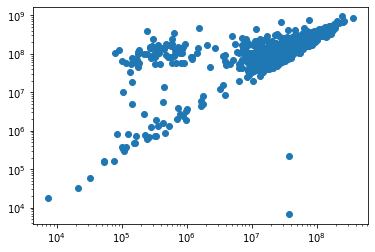

In [420]:
plt.loglog(df_dummy2['Domestic_Opening'],df_dummy2['Domestic_Gross'],'o')

In [426]:
X_all=df_dummy2.drop(columns=['Domestic_Gross']) #X_all = all columns except target (y)
y=df_dummy2['Domestic_Gross'].values

In [427]:
y

array([7.60507625e+08, 8.58373000e+08, 6.59363944e+08, ...,
       5.06486790e+07, 4.63513450e+07, 4.64624690e+07])

In [430]:
X=df_dummy2[['World_Gross','Domestic_Percentage','Foreign_Gross','Foreign_Percentage']]
X

,World_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage
0,2847246203,26.7,2086738578,73.3
1,2797501328,30.7,1939128328,69.3
2,2201647264,30.0,1542283320,70.0
3,2069521700,45.3,1132859475,54.7
4,2048359754,33.1,1369544272,66.9
...,...,...,...,...
1182,147792047,28.2,106124931,71.8
1183,147748505,58.9,60708540,41.1
1184,147717833,34.3,97069154,65.7
1185,147554998,31.4,101203653,68.6


In [438]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_all)
#X_std = pd.DataFrame(X_std, columns = columns) #dont apply x-std to df because it messes up the reg

In [442]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.20)

In [443]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.9776333180707114

In [444]:
#not much insight from lasso
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/lilygoldwasser/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7769638660374798e+16, tolerance: 1021690077570961.0
  model = cd_fast.enet_coordinate_descent(


0.9795610793441024

In [445]:
reg.score(X_test, y_test)

0.9776333180707114

In [446]:
y_pred=reg.predict(X_test)

In [475]:
# y_pred

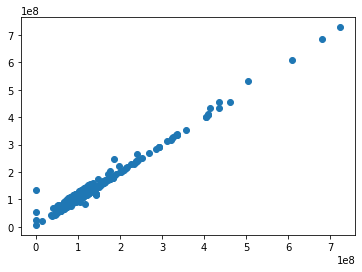

In [449]:
plt.plot(y_test,y_pred,'o')
#nice!